In [14]:
import ringity as rng
import networkx as nx
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt

In [15]:
FIBRO_FILE = "connectivity_FLS11_data.xls"

name = "FLS18 TNF"

In [16]:
d = 115    # threshold

fibro_position_df = pd.read_excel(FIBRO_FILE, sheet_name=name)
D_fibro = squareform(pdist(fibro_position_df[['Position X','Position Y','Position Z']])) # distance matrix

G_fibro = nx.from_numpy_array(np.where(D_fibro > d,0,1))    # create (unweighted) network 
G_fibro = G_fibro.subgraph(max(nx.connected_components(G_fibro), key=len)).copy() # get lcc, in case threshold was chosen too low
    
pos = nx.spring_layout(G_fibro)

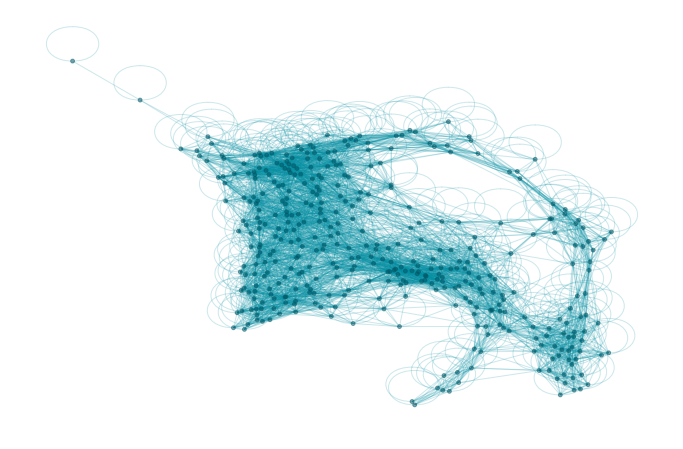

In [17]:
rng.plot_nx(G_fibro, pos=pos, node_alpha=0.5)

In [21]:
dgm = rng.diagram(G_fibro)
print(dgm)

[(237.23512268066406, 552.0025024414062),
 (175.2395782470703, 356.76324462890625),
 (101.76713562011719, 140.71786499023438),
 (111.98863220214844, 135.29478454589844),
 (41.6556396484375, 61.566436767578125),
 (59.571231842041016, 74.3666000366211),
 (64.43134307861328, 77.4067153930664),
 (76.88395690917969, 89.45310974121094),
 (72.210205078125, 84.44239807128906),
 (41.69060134887695, 52.521820068359375),
 (50.7849235534668, 61.06859588623047),
 (62.118743896484375, 71.3251953125),
 (48.72832489013672, 56.47751998901367),
 (42.41655731201172, 49.51322937011719),
 (40.08526611328125, 46.862213134765625),
 (50.363525390625, 57.07183837890625),
 (39.602508544921875, 45.875267028808594),
 (44.928775787353516, 51.03388214111328),
 (175.11207580566406, 181.131591796875),
 (46.13201141357422, 51.354042053222656),
 (62.45333480834961, 67.6487045288086),
 (49.13813018798828, 54.001075744628906),
 (61.13694381713867, 65.8384017944336),
 (42.99486541748047, 47.5453987121582),
 (86.8880844116

Text(0, 0.5, 'time of death')

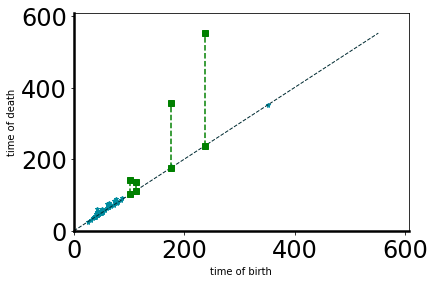

In [43]:
rng.plot_dgm(dgm)
for coordinates in dgm:
    # green line if alive for at least 20
    if coordinates[0]+20 < coordinates[1]:
        plt.plot([coordinates[0],coordinates[0]],[coordinates[0], coordinates[1]], 'gs--')

plt.xlabel('time of birth')
plt.ylabel('time of death')

In [20]:
dgm.ring_score()

0.6648079056159881